# Tanzania Wells Project
***By: Brian Kitainge Kisilu***

# Business Understanding

Limited access to safe drinking water affects hundreds of millions of people worldwide. Over 57 million Tanzanians are fighting to get access to clean water, life's most important resource. Access to clean, safe water is crucial for the health of Tanzanian households. Water is also critical to the development of the country because it is required for agricultural and industrial output. The issue of water supply in Tanzania is concerning, because while there is plenty of fresh water available throughout the country, there are several access issues with the country's water wells. There is a clear need to identify the non-functioning wells that are prohibiting citizens from exercising a core human right. Our model will enable government authorities to dentify which water wells require repairs and take immediate action to improve the quality of life for citizens in need.

### Objectives

The research study was embodied based on the following objectives:
1. To predict the condition of a waterpoint pump based on the geographical location
2. To predict the condition of a waterpoint pump based on age
3. To find patterns in non-functional waterpoint to influence how new waterpoints are built
4. To identify effect of waterquality on water pumps


### Model Success Metrics
The models shall be evaluated based on  *Acurracy* and *Precision* which are measures that indicate how well the model is able to identify the status of a water well given the other factors. For this study models that will attain a score of *65%* and above on the stated metrics will be considered to be a well performing model

# Data Understanding

### Importing libraries and loading data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the Tanzanian boreholes dataset
data = pd.read_csv("train_set_values.csv")
#viewing the top 10 rows
data.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [3]:
#viewing the bottom 10 rows
data.tail(10)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59390,13677,0.0,2011-08-04,Rudep,1715,DWE,31.370848,-8.258160,Kwa Mzee Atanas,0,...,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump
59391,44885,0.0,2013-08-03,Government Of Tanzania,540,Government,38.044070,-4.272218,Kwa,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59392,40607,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Benard Charles,0,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59393,48348,0.0,2012-10-27,Private,0,Private,33.866852,-4.287410,Kwa Peter,0,...,per bucket,soft,good,insufficient,insufficient,dam,dam,surface,other,other
59394,11164,500.0,2011-03-09,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,0,...,monthly,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [4]:
#lets see what the columns in the dataframe contain
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [5]:
# reading the dataset that shows the functionality status of the water pumps
data2 = pd.read_csv("training_set_labels.csv")
data2.head(10)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
5,9944,functional
6,19816,non functional
7,54551,non functional
8,53934,non functional
9,46144,functional


In [6]:
data2.tail(10)

,id,status_group
59390,13677,functional
59391,44885,non functional
59392,40607,non functional
59393,48348,functional
59394,11164,non functional
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional
59399,26348,functional


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


Now we merge the two datasets

In [8]:
main_df=data.join(data2.set_index('id'),on='id')
main_df.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [9]:
main_df.tail(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
59390,13677,0.0,2011-08-04,Rudep,1715,DWE,31.370848,-8.258160,Kwa Mzee Atanas,0,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59391,44885,0.0,2013-08-03,Government Of Tanzania,540,Government,38.044070,-4.272218,Kwa,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,non functional
59392,40607,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Benard Charles,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
59393,48348,0.0,2012-10-27,Private,0,Private,33.866852,-4.287410,Kwa Peter,0,...,soft,good,insufficient,insufficient,dam,dam,surface,other,other,functional
59394,11164,500.0,2011-03-09,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [10]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [11]:
main_df.shape

(59400, 41)

In [12]:
main_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


### Observations
1. The object *datatype* needs to be changed to category datatype.
2. The *amount_tsh* needs to be changed from float to integer since the 0s are redundant.
3. The dataset is large and does not contain alot of null values. However, upon further investigation of the columns it is realized that the column num_private only contains 0 values thus will have to be dropped. The columns: source_type, waterpoint_type, and quantity_group will also be dropped as they are duplicate columns.
4. The *construction_year*, *amount_tsh* and *population* column appears to have a big number of 0s

Now lets generate a heatmap of correlation to visualize the correalation that exists between the different variables

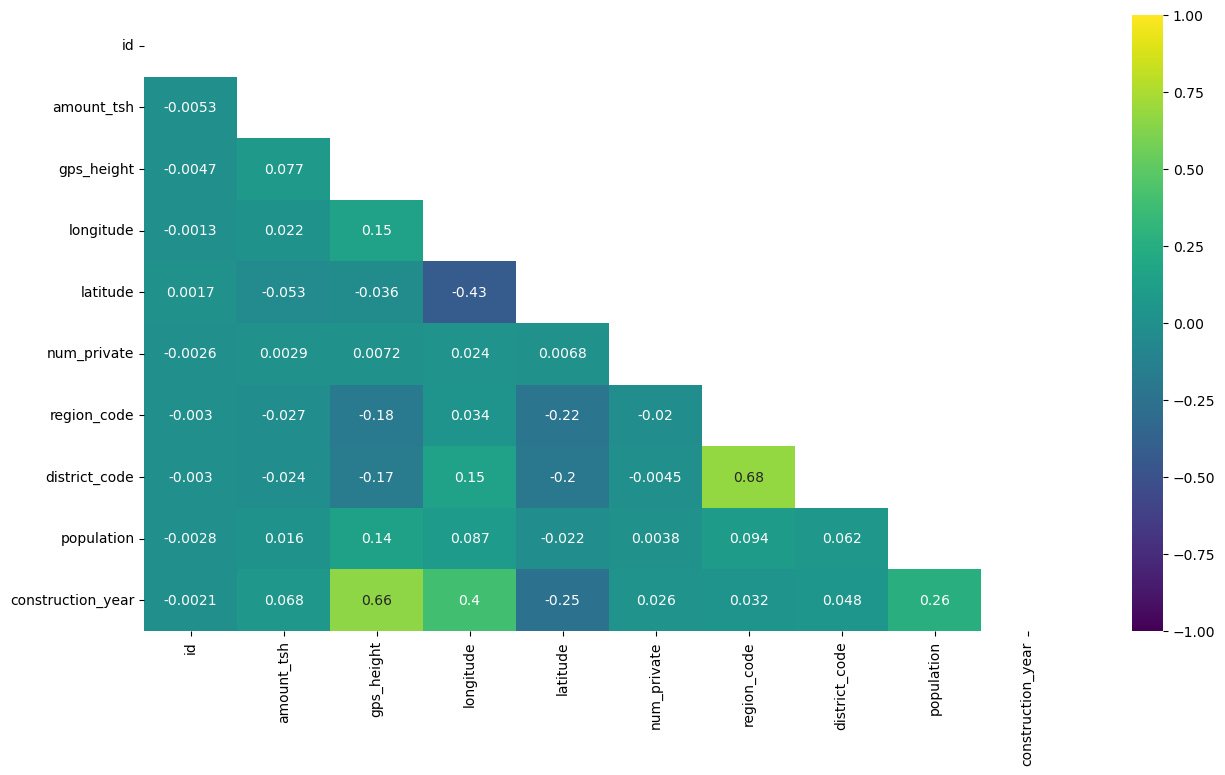

In [13]:
fig,ax  = plt.subplots(figsize=(15,8))
mask = np.triu(np.ones_like(main_df.corr(), dtype=np.bool))
sns.heatmap(data=main_df.corr(),center=0,vmin=-1,vmax=1,annot=True,mask=mask,cmap=sns.color_palette("viridis", as_cmap=True));



## Data Preparation

Here after looking at the data a selection of the columns that will used in the model was made. These columns were then grouped depending on whether they were numerical or categorical.

The categorical columns selected are:
1. funder

2. installer

3. date_recorded

4. basin

5. region

6. scheme_management

7. extraction_type_class

8. payment

9. water_quality

10. quantity

11. source_type

12. waterpoint_type_group

13. status_group

The numerical columns selected are:
1. amount_tsh

2. gps_height

3. population

4. longitude

5. latitude

6. construction_year


Now we create a dataframe that contains the above columns.

In [14]:
tz_df = main_df.loc[:, ['amount_tsh', 'gps_height', 'funder', 'installer', 'population', 'longitude',
                 'latitude','date_recorded', 'construction_year','basin', 'region', 
                   'scheme_management', 'extraction_type_class',
                  'payment', 'water_quality', 'quantity', 'source_type', 'waterpoint_type_group', 'status_group']]

tz_df.head(10)

,amount_tsh,gps_height,funder,installer,population,longitude,latitude,date_recorded,construction_year,basin,region,scheme_management,extraction_type_class,payment,water_quality,quantity,source_type,waterpoint_type_group,status_group
0,6000.0,1390,Roman,Roman,109,34.938093,-9.856322,2011-03-14,1999,Lake Nyasa,Iringa,VWC,gravity,pay annually,soft,enough,spring,communal standpipe,functional
1,0.0,1399,Grumeti,GRUMETI,280,34.698766,-2.147466,2013-03-06,2010,Lake Victoria,Mara,Other,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,686,Lottery Club,World vision,250,37.460664,-3.821329,2013-02-25,2009,Pangani,Manyara,VWC,gravity,pay per bucket,soft,enough,dam,communal standpipe,functional
3,0.0,263,Unicef,UNICEF,58,38.486161,-11.155298,2013-01-28,1986,Ruvuma / Southern Coast,Mtwara,VWC,submersible,never pay,soft,dry,borehole,communal standpipe,non functional
4,0.0,0,Action In A,Artisan,0,31.130847,-1.825359,2011-07-13,0,Lake Victoria,Kagera,NaN,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional
5,20.0,0,Mkinga Distric Coun,DWE,1,39.172796,-4.765587,2011-03-13,2009,Pangani,Tanga,VWC,submersible,pay per bucket,salty,enough,other,communal standpipe,functional
6,0.0,0,Dwsp,DWSP,0,33.362410,-3.766365,2012-10-01,0,Internal,Shinyanga,VWC,handpump,never pay,soft,enough,borehole,hand pump,non functional
7,0.0,0,Rwssp,DWE,0,32.620617,-4.226198,2012-10-09,0,Lake Tanganyika,Shinyanga,NaN,handpump,unknown,milky,enough,shallow well,hand pump,non functional
8,0.0,0,Wateraid,Water Aid,0,32.711100,-5.146712,2012-11-03,0,Lake Tanganyika,Tabora,VWC,handpump,never pay,salty,seasonal,borehole,hand pump,non functional
9,0.0,0,Isingiro Ho,Artisan,0,30.626991,-1.257051,2011-08-03,0,Lake Victoria,Kagera,NaN,handpump,never pay,soft,enough,shallow well,hand pump,functional


In [15]:
tz_df.tail(10)

,amount_tsh,gps_height,funder,installer,population,longitude,latitude,date_recorded,construction_year,basin,region,scheme_management,extraction_type_class,payment,water_quality,quantity,source_type,waterpoint_type_group,status_group
59390,0.0,1715,Rudep,DWE,150,31.370848,-8.258160,2011-08-04,1991,Lake Tanganyika,Rukwa,VWC,handpump,never pay,soft,insufficient,borehole,hand pump,functional
59391,0.0,540,Government Of Tanzania,Government,210,38.044070,-4.272218,2013-08-03,1967,Pangani,Kilimanjaro,Water authority,gravity,never pay,soft,enough,river/lake,communal standpipe,non functional
59392,0.0,0,Government Of Tanzania,Government,0,33.009440,-8.520888,2011-04-15,0,Lake Rukwa,Mbeya,VWC,gravity,never pay,soft,enough,spring,communal standpipe,non functional
59393,0.0,0,Private,Private,0,33.866852,-4.287410,2012-10-27,0,Internal,Tabora,Water authority,gravity,pay per bucket,soft,insufficient,dam,other,functional
59394,500.0,351,World Bank,ML appro,89,37.634053,-6.124830,2011-03-09,2007,Wami / Ruvu,Morogoro,VWC,submersible,pay monthly,soft,enough,borehole,communal standpipe,non functional
59395,10.0,1210,Germany Republi,CES,125,37.169807,-3.253847,2013-05-03,1999,Pangani,Kilimanjaro,Water Board,gravity,pay per bucket,soft,enough,spring,communal standpipe,functional
59396,4700.0,1212,Cefa-njombe,Cefa,56,35.249991,-9.070629,2011-05-07,1996,Rufiji,Iringa,VWC,gravity,pay annually,soft,enough,river/lake,communal standpipe,functional
59397,0.0,0,NaN,NaN,0,34.017087,-8.750434,2011-04-11,0,Rufiji,Mbeya,VWC,handpump,pay monthly,fluoride,enough,borehole,hand pump,functional
59398,0.0,0,Malec,Musa,0,35.861315,-6.378573,2011-03-08,0,Rufiji,Dodoma,VWC,handpump,never pay,soft,insufficient,shallow well,hand pump,functional
59399,0.0,191,World Bank,World,150,38.104048,-6.747464,2011-03-23,2002,Wami / Ruvu,Morogoro,VWC,handpump,pay when scheme fails,salty,enough,shallow well,hand pump,functional


In [16]:
tz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   gps_height             59400 non-null  int64  
 2   funder                 55765 non-null  object 
 3   installer              55745 non-null  object 
 4   population             59400 non-null  int64  
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   date_recorded          59400 non-null  object 
 8   construction_year      59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  region                 59400 non-null  object 
 11  scheme_management      55523 non-null  object 
 12  extraction_type_class  59400 non-null  object 
 13  payment                59400 non-null  object 
 14  water_quality          59400 non-null  object 
 15  qu

Now we group the columns in our dataframe.

In [17]:
#categorical columns
categorical_cols = tz_df.select_dtypes(include='object').columns
categorical_cols

Index(['funder', 'installer', 'date_recorded', 'basin', 'region',
       'scheme_management', 'extraction_type_class', 'payment',
       'water_quality', 'quantity', 'source_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [18]:
#numerical columns
numerical_cols = tz_df.select_dtypes(include='number').columns
numerical_cols

Index(['amount_tsh', 'gps_height', 'population', 'longitude', 'latitude',
       'construction_year'],
      dtype='object')

## Data Cleaning

Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies our dataset. It ensures that the data is accurate, complete, and consistent, which in turn helps to improve the quality and reliability of the insights and conclusions drawn from the data. The employed techniques in data cleaning include removing duplicate records, handling missing values, correcting data formats and data types, and dealing with outliers and anomalies.

###  Checking for duplicates

In [19]:
#checking for duplicates
tz_df.duplicated().sum()

688

Our dataset has 688 duplicate values. The duplicate values need to be dropped.

In [20]:
# drop the duplicated values
tz_df.drop_duplicates(inplace=True)

#checking for any duplicates
tz_df.duplicated().sum()

0

### Handling missing values

In [21]:
#function for identifying with missing values
def missing_values(data):
    """
    Identify the missing values and their percentages
    Drop values that have no missing values
    Return only dara with missing values
    """
    miss_val = data.isna().sum().sort_values(ascending = False)
    percentage = (data.isna().sum() / len(data)).sort_values(ascending = False)
    missing_values = pd.DataFrame({"Missing Values": miss_val, "In Percentage": percentage})
    missing_values.drop(missing_values[missing_values["In Percentage"] == 0].index, inplace=True)
    return missing_values

In [22]:
missing_values(tz_df)

,Missing Values,In Percentage
scheme_management,3854,0.065642
installer,3653,0.062219
funder,3633,0.061878


Here we can see the columns that have missing values.

In [23]:
#dropping the rows of columns with missing values
tz_df = tz_df.dropna()
tz_df.head()

,amount_tsh,gps_height,funder,installer,population,longitude,latitude,date_recorded,construction_year,basin,region,scheme_management,extraction_type_class,payment,water_quality,quantity,source_type,waterpoint_type_group,status_group
0,6000.0,1390,Roman,Roman,109,34.938093,-9.856322,2011-03-14,1999,Lake Nyasa,Iringa,VWC,gravity,pay annually,soft,enough,spring,communal standpipe,functional
1,0.0,1399,Grumeti,GRUMETI,280,34.698766,-2.147466,2013-03-06,2010,Lake Victoria,Mara,Other,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,686,Lottery Club,World vision,250,37.460664,-3.821329,2013-02-25,2009,Pangani,Manyara,VWC,gravity,pay per bucket,soft,enough,dam,communal standpipe,functional
3,0.0,263,Unicef,UNICEF,58,38.486161,-11.155298,2013-01-28,1986,Ruvuma / Southern Coast,Mtwara,VWC,submersible,never pay,soft,dry,borehole,communal standpipe,non functional
5,20.0,0,Mkinga Distric Coun,DWE,1,39.172796,-4.765587,2011-03-13,2009,Pangani,Tanga,VWC,submersible,pay per bucket,salty,enough,other,communal standpipe,functional


In [24]:
#confirming if there any missing values
missing_values(tz_df)

,Missing Values,In Percentage


There are no missing values in our dataset

### Checking for outliers in our dataset

In [ ]:
sns.set_style("whitegrid")

def box_plot(data, column, hue=None):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=column, data=data, hue=hue)
    plt.title(f"{column} outliers")
    plt.show()

: 

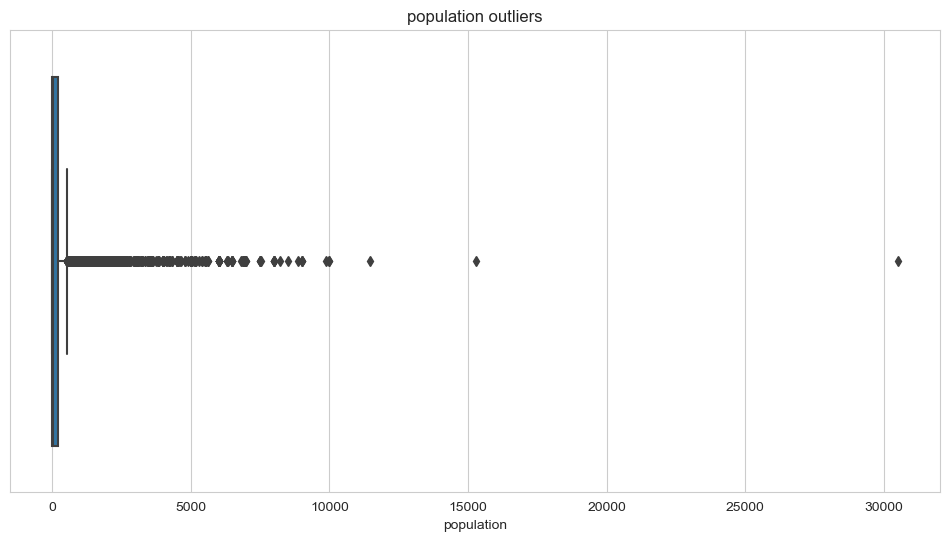

In [26]:
box_plot(tz_df, 'population')

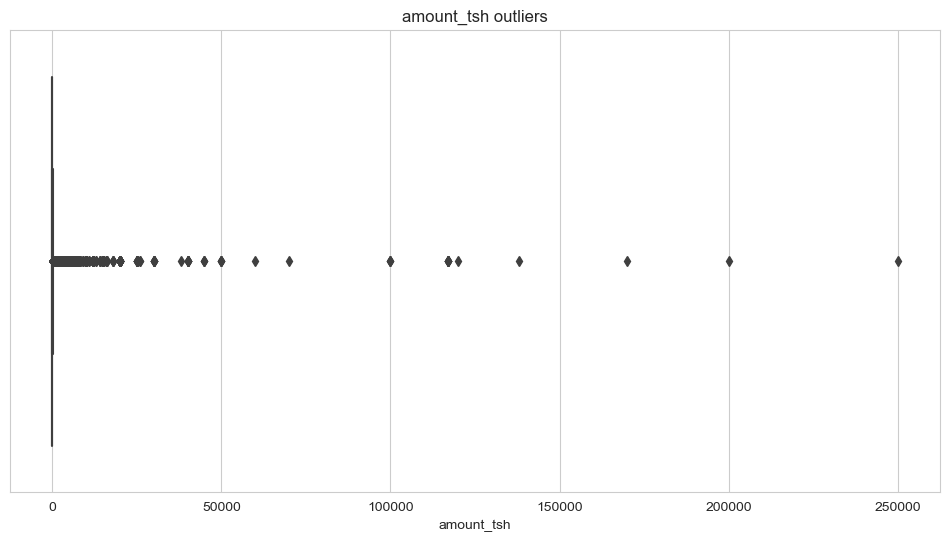

In [27]:
box_plot(tz_df, 'amount_tsh')

In [ ]:
box_plot(tz_df, 'decade')

### Correcting column data types

In [29]:
#changing object datatype into category
for i in categorical_cols:
    tz_df[i] = tz_df[i].astype('category')

In [30]:
#changing amount_tsh to integer since the 0s in the float are redundant
tz_df['amount_tsh'] = tz_df['amount_tsh'].astype('int64')

In [31]:
tz_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51217 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   amount_tsh             51217 non-null  int64   
 1   gps_height             51217 non-null  int64   
 2   funder                 51217 non-null  category
 3   installer              51217 non-null  category
 4   population             51217 non-null  int64   
 5   longitude              51217 non-null  float64 
 6   latitude               51217 non-null  float64 
 7   date_recorded          51217 non-null  category
 8   construction_year      51217 non-null  int64   
 9   basin                  51217 non-null  category
 10  region                 51217 non-null  category
 11  scheme_management      51217 non-null  category
 12  extraction_type_class  51217 non-null  category
 13  payment                51217 non-null  category
 14  water_quality          51217 non-null 

In [32]:
tz_df.describe()

,amount_tsh,gps_height,population,longitude,latitude,construction_year
count,51217.000000,51217.000000,51217.000000,51217.000000,5.121700e+04,51217.000000
mean,349.372786,708.914052,182.980905,34.507423,-5.706283e+00,1360.472011
std,2820.438025,696.674407,479.993076,5.552392,2.877913e+00,930.603746
min,0.000000,-90.000000,0.000000,0.000000,-1.164944e+01,0.000000
25%,0.000000,0.000000,0.000000,33.151330,-8.223294e+00,0.000000
50%,0.000000,490.000000,40.000000,35.152189,-4.996336e+00,1988.000000
75%,35.000000,1341.000000,217.000000,37.353301,-3.326436e+00,2005.000000
max,250000.000000,2770.000000,30500.000000,40.323402,-2.000000e-08,2013.000000


## Exploratory Data Analysis

This process involves using various statistical and visualization techniques to explore and understand the data, without making any assumptions or preconceptions about what the data should look like.

### Univariate Anlaysis

This process involves using various statistical and visualization techniques to explore and understand the data, without making any assumptions or preconceptions about what the data should look like.
We start with univariate analysis of the numerical columns.

In [33]:
#a function to plot histograms
def hist_plot(data,column):
    fig,ax=plt.subplots(figsize=(12,8))
    plt.hist(data=data, x=column, color="Turquoise")
    plt.title(f"Distribution of {column}")
    mn=round(data[column].mean(),2)
    ax.axvline(x=mn,label=(f'mean:{mn}'),color='orange')
    plt.xlabel(f'{column}')
    plt.ylabel('frequency')
    plt.legend()
    plt.show()
     

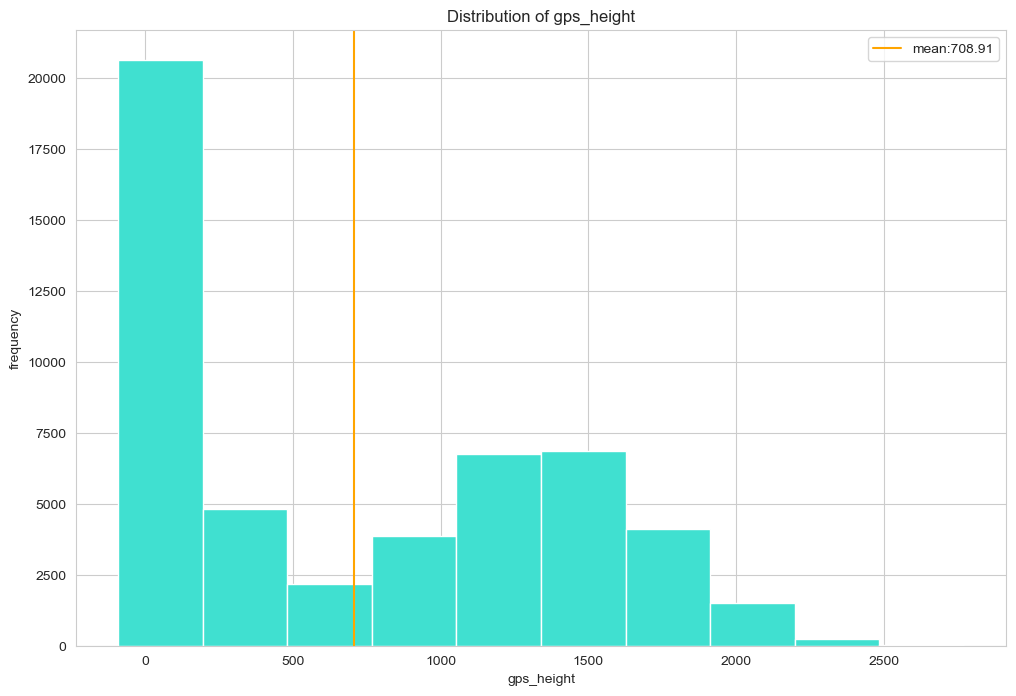

In [34]:
hist_plot(tz_df, 'gps_height')

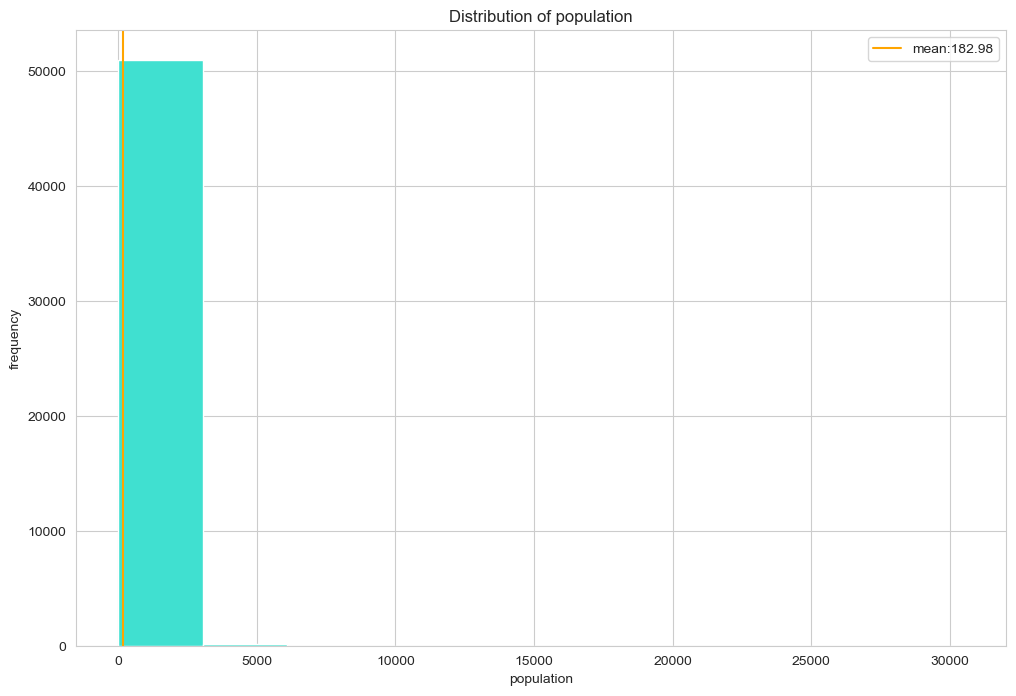

In [35]:
hist_plot(tz_df, 'population')

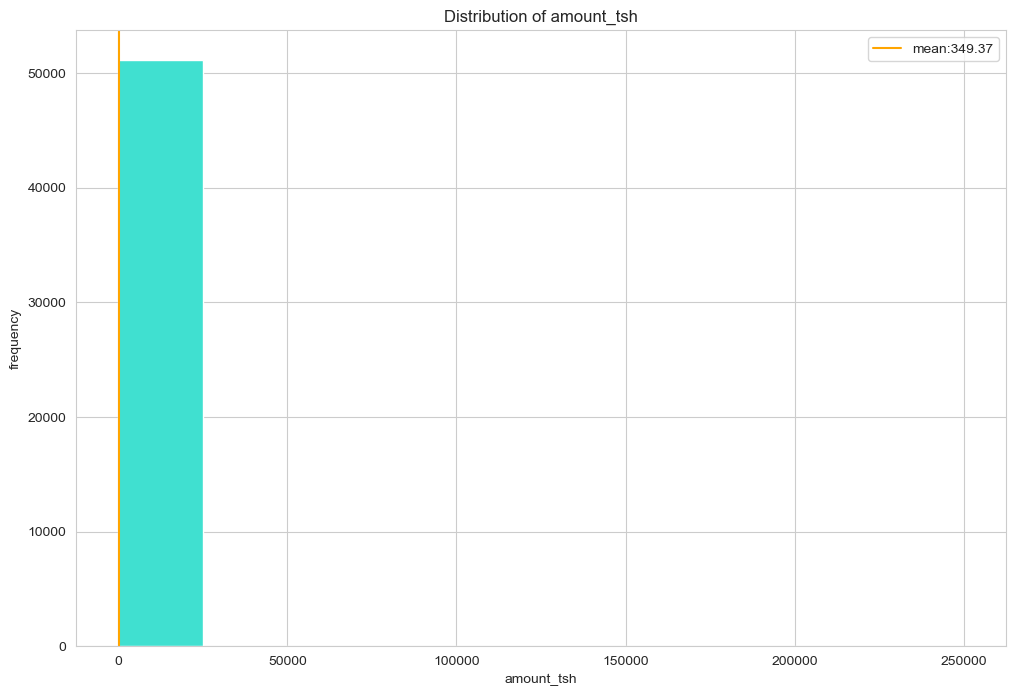

In [36]:
hist_plot(tz_df, 'amount_tsh')

### *Observations*

1. The distribution of gps_height of the waterpoints is positively skewed
2. The distribution of the population around waterpoints is positively skewed
3. The distribution of the population around waterpoints is positively skewed

Now we carry out a univariate analysis of the categorical columns

We start with the column *status_group* which is our target variable which indicates whether a waterpoint is *functional*, *non-functional* or *functional and needs repair*. Let us have a look at the percentage distribution of the boreholes based on the *status_group*

Text(0.5, 1.0, 'Percentage of Water Points by Status Group')

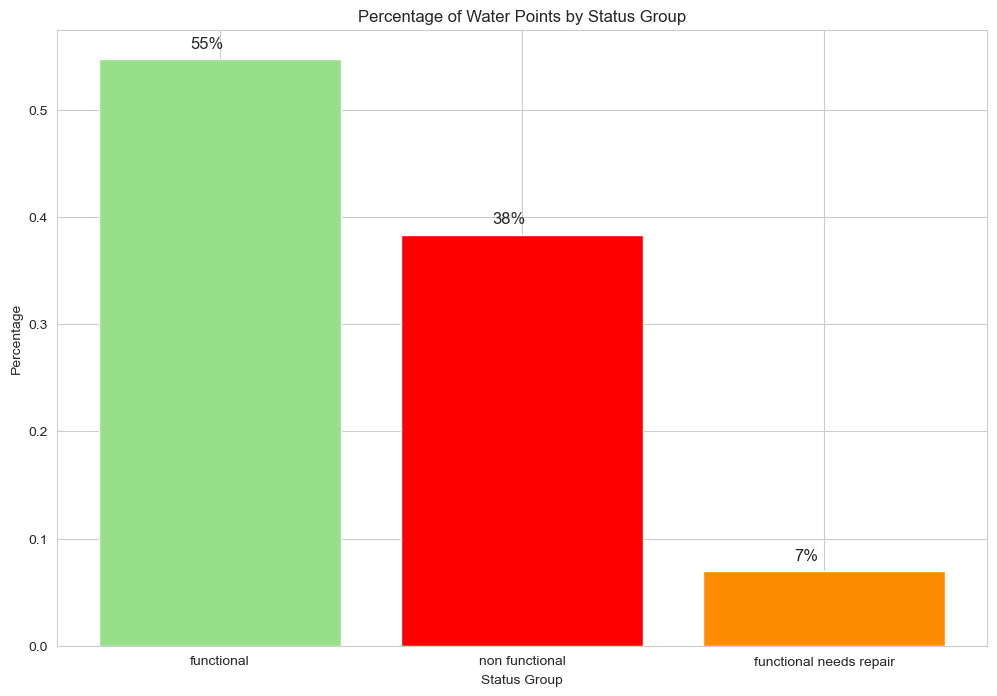

In [37]:
# Define the colors for the bars
colors = ['#98df8a', '#ff0000', '#ff8c00']

# Calculate the value counts of the 'status_group' column as a percentage
counts = tz_df['status_group'].value_counts(normalize=True)

# Create the bar graph
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(counts.index, counts.values, color=colors)

# Add the percentage values to the top of each bar
for i, v in enumerate(counts):
    ax.text(i-0.1, v+0.01, f"{v:.0%}", fontsize=12)
    
# Set the axis labels and title
ax.set_xlabel('Status Group')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Water Points by Status Group')

From the above bargraph visulaization we can tell that 55% of the boreholes are functional, 38% of them are non functional and 7% need repair.

In [38]:
# Function to display count plots of the selected column
def count_plot(data, column, hue=None, palette=None):
    plt.figure(figsize=(12,6))
    sns.countplot(x=column, data=data, hue=hue, order=data[column].value_counts().index, palette="tab20")
    plt.title(f"{column} count plot")
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

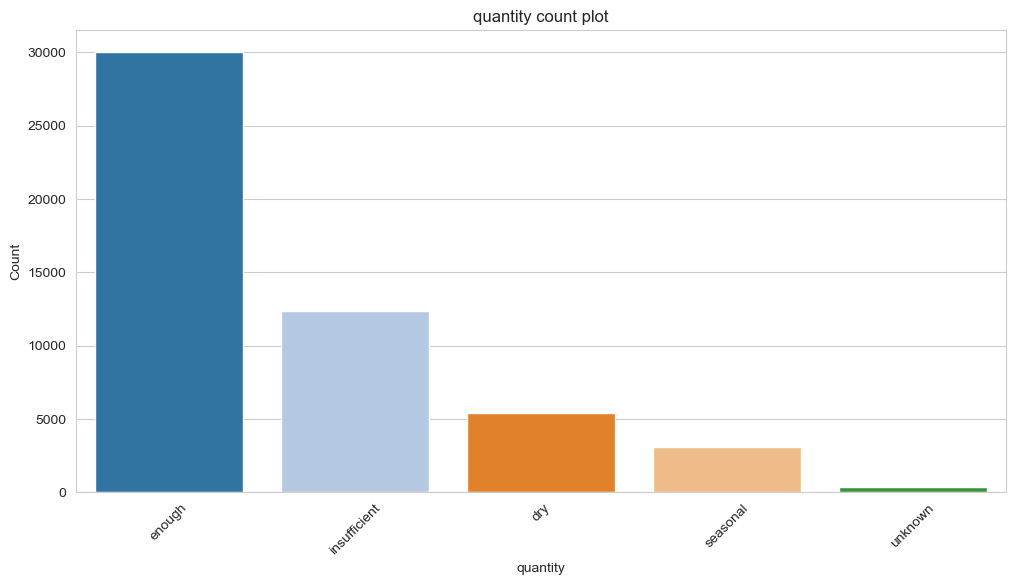

In [39]:
count_plot(tz_df, 'quantity')

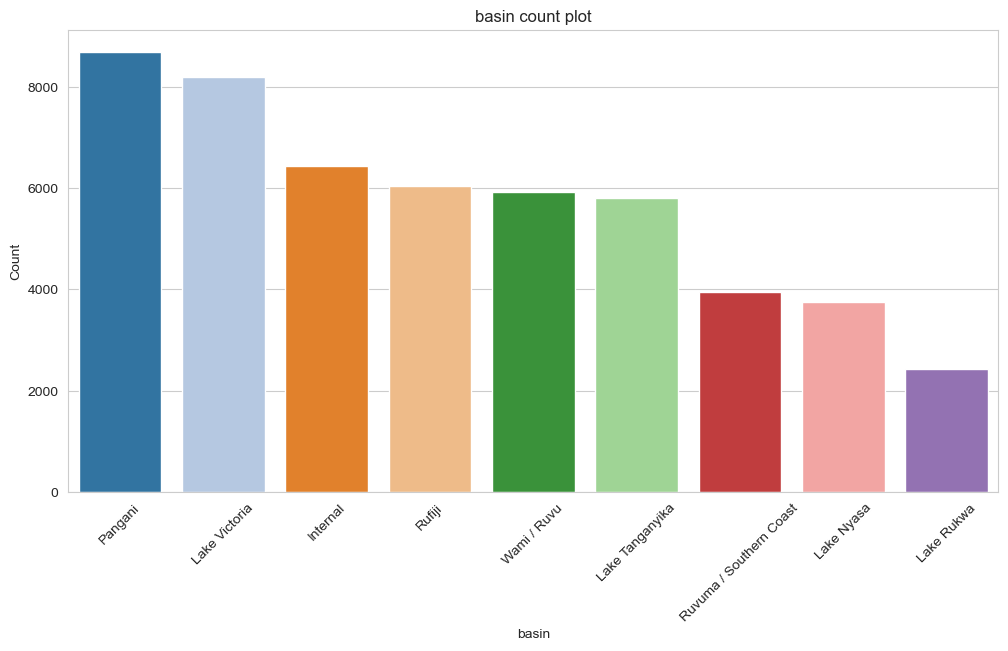

In [40]:
count_plot(tz_df, 'basin')

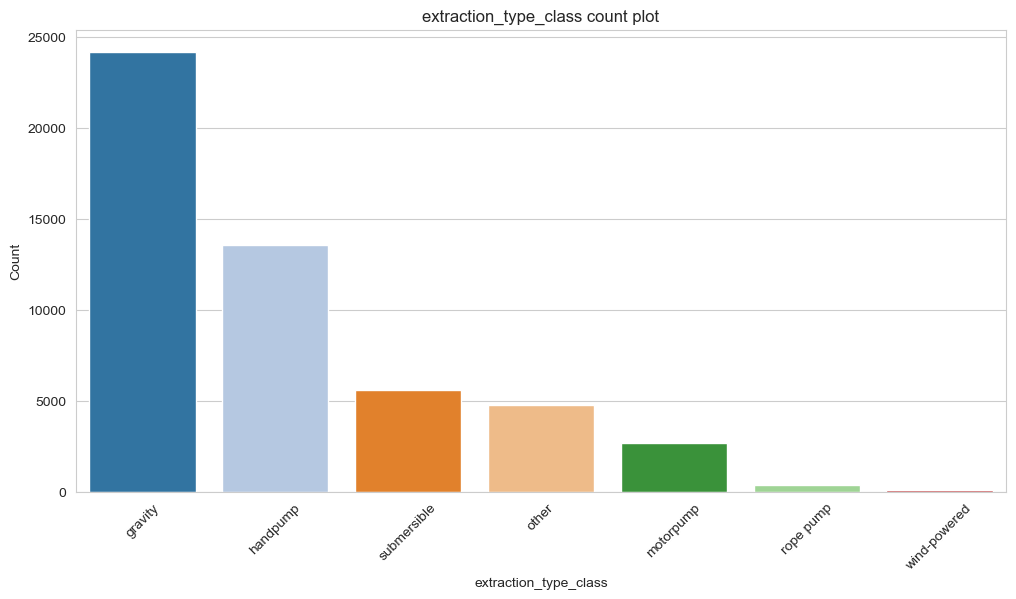

In [41]:
count_plot(tz_df, 'extraction_type_class')

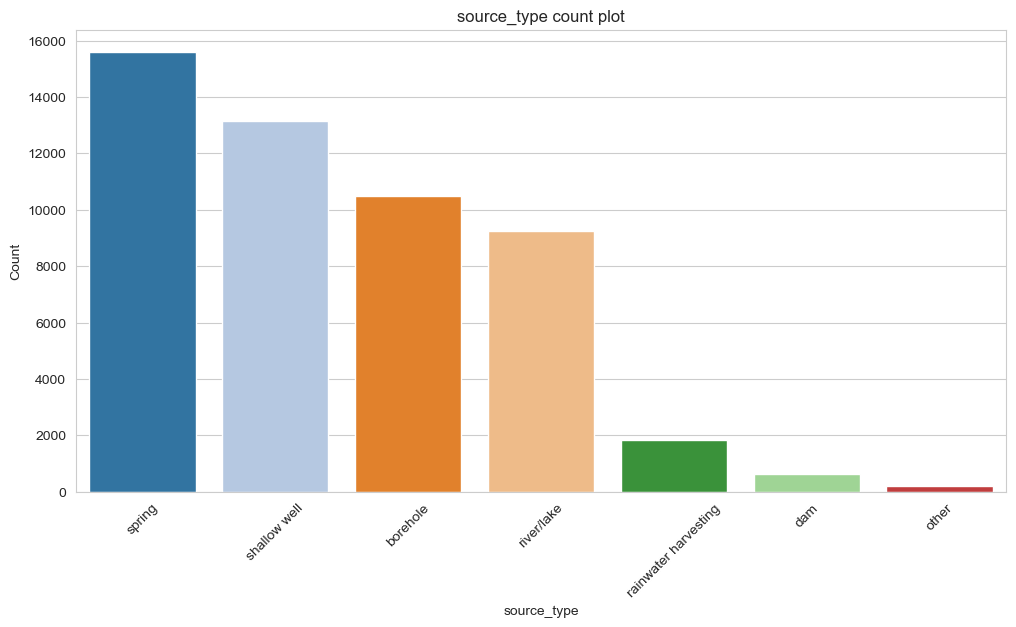

In [42]:
count_plot(tz_df, 'source_type')

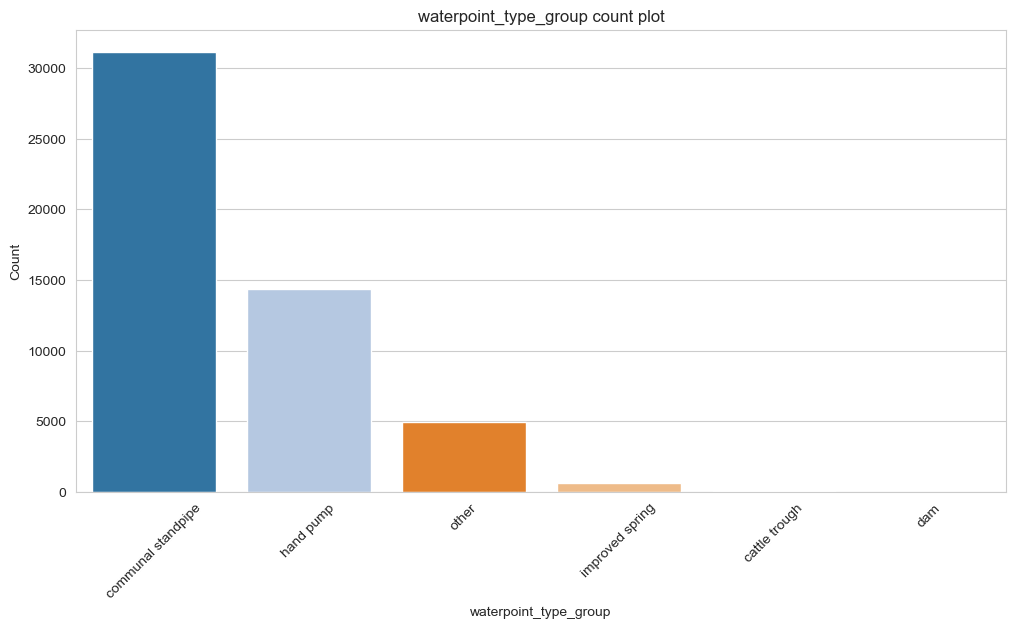

In [43]:
count_plot(tz_df, 'waterpoint_type_group')

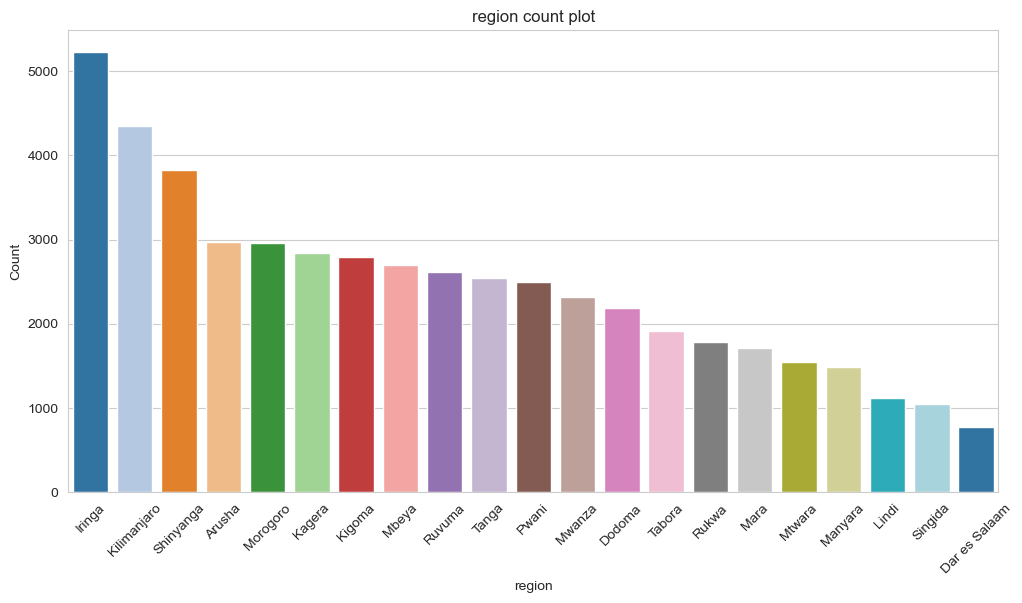

In [44]:
count_plot(tz_df, 'region')

### Observations

1. 55% of waterpoints are functional, 38% are non-functional, 7% are functional and need repair
2. The highest number of waterpoints have enough water, then the rest have insufficient, dry, seasonal and unknown quantities respectively.
3. Most waterpoints draw their water from Pangani basin followed by Lake Victoria basin.
4. Most waterpoints use pumps that extract water gravity wise, handpumps come as a close second while the wind powered pumps are the least popular. The gravity water pumps may hint at the geographical layout of the land and hand pumps may indicate they are cost-efficienct
5. springs are most common source of water for waterpoints, followed by shallow wells, boreholes,rivers/lakes, rainwater harvesting, dams and others respectively
6. The most common kinds of waterpoints are communal standpipes. Handpump kind of waterpoints are also common.
7. Iringa, Kilimanjaro, Shinyanga, Arusha and Morogoro are the top 5 regions with the most waterpoints


## Bivariate analysis

Bivariate analysis is a statistical analysis technique that involves analyzing the relationship between two variables. It is used to determine whether there is a correlation or association between two variables, and to explore the strength and direction of that relationship.

Here we explore whether the predictor variables have an effect on our target variable which is *status_group* that describes the functionality of the water pumps.

### Status_group vs water_quality

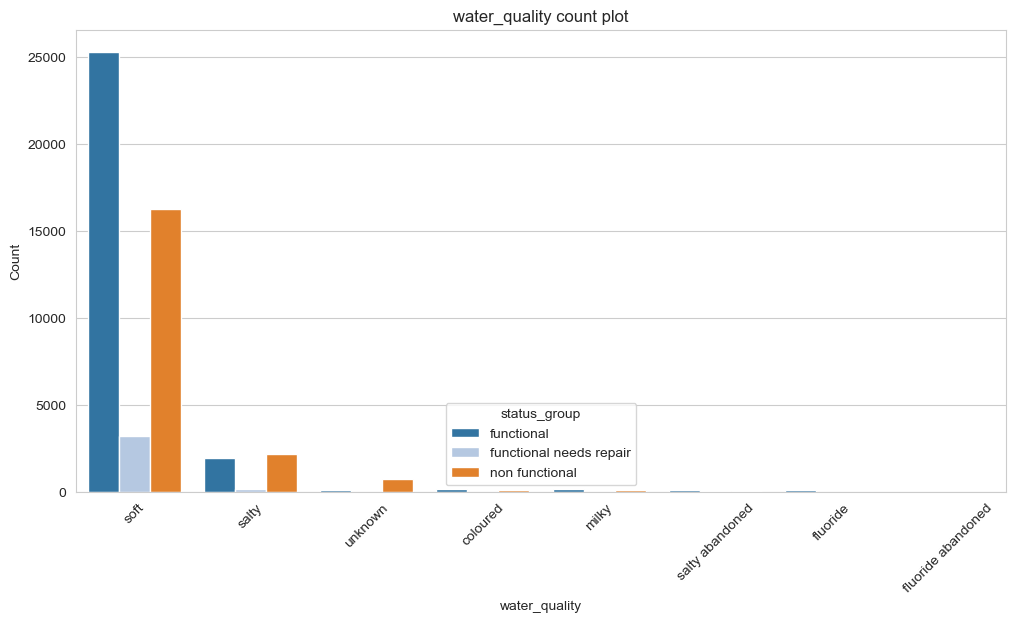

In [45]:
count_plot(data=tz_df,column='water_quality',hue='status_group')

### Status_group vs quantity


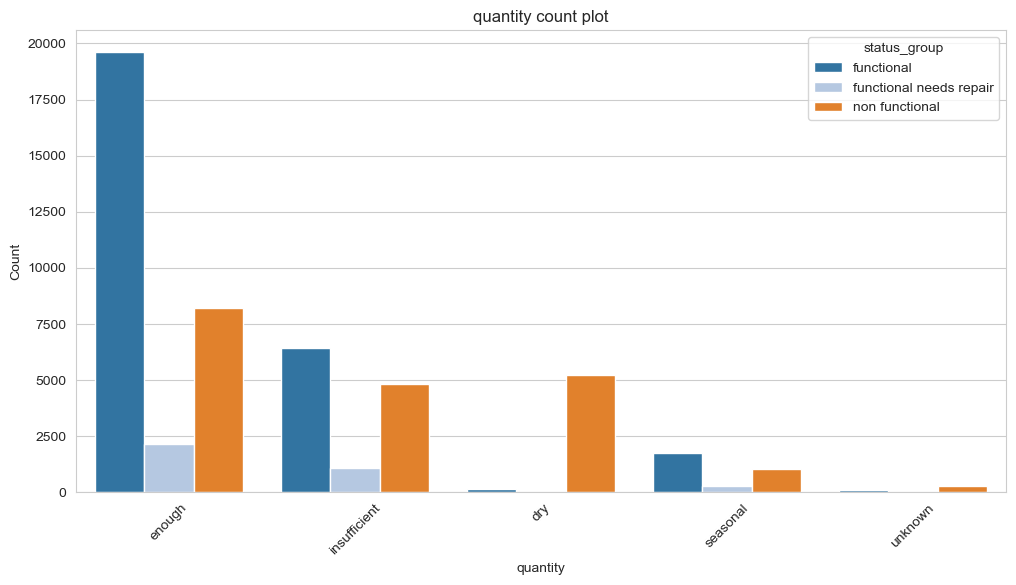

In [46]:
count_plot(data=tz_df,column='quantity',hue='status_group')

### Status_group vs region

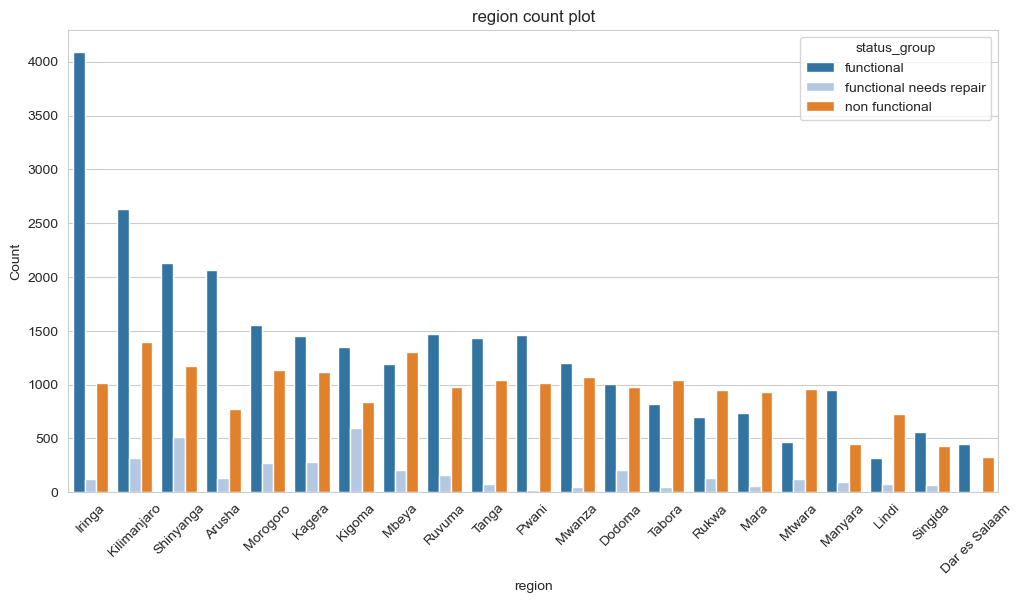

In [47]:
count_plot(tz_df,'region','status_group')

### Status_group vs source_type

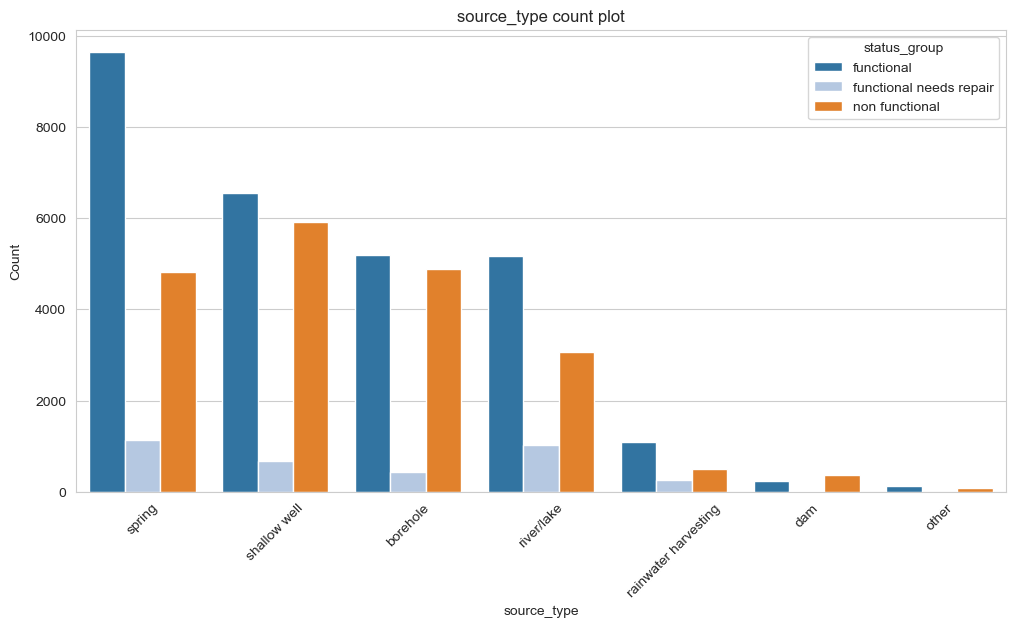

In [48]:
count_plot(tz_df,'source_type','status_group')

### Observations

1. Most functional waterpoint pumps are those with soft water
2. Waterpoint with enough water are the most functional with a relatively small number of non functional pumps. Those waterpoints with insufficient water have very few functional pumps.
3. Iringa, Kilimanjaro, Shinyanga are the top 3 regions with the most functional pumps. Kilimanjaro and Mbeya have the highest number of non functional pumps. Kigoma has the highest functional pumps that need repair
4. It can be noted that water drawn from springs and shallow wells have the highest number of functional pumps. Water drawn from Springs have the highest number of functional pumps that need repair. Water drawn from Shallow wells and boreholes have the highest number of non functional wells
5. Most functional waterpoints are located near the Pangani and Lake Victoria basin

## Feature Engineering

Feature engineering is the process of selecting, transforming, and creating new features from the available raw data to improve the performance of machine learning models.

First we replace the 0s in *construction_year* with the median year of the dataset.

In [49]:
#finding the median of years != 0
#replace the 0s in construction year with that median
median = tz_df.construction_year[tz_df.construction_year != 0].median()
tz_df.construction_year.replace(0, median, inplace=True)

In [50]:
#create a new column decade
tz_df['decade'] = tz_df['construction_year'] 

Next we create a new column *decade* that replaces the construction year with the decade of construction for further consistency.

In [51]:
#binning the construction year into decade
tz_df['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
tz_df['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
tz_df['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
tz_df['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
tz_df['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
tz_df['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)


In [52]:
#lets view the didtribution of the wells construction decades
tz_df['decade'].value_counts()

00s    30319
90s     6633
80s     4999
10s     4665
70s     4130
60s      471
Name: decade, dtype: int64

Now we change the object *time* from integer type to date-time type.

In [53]:
#changing date to date time object
tz_df['date_recorded']=pd.to_datetime(tz_df['date_recorded'])
tz_df['year_recorded']=tz_df['date_recorded'].apply(lambda x: x.year)

tz_df.drop('date_recorded', axis=1, inplace=True)

Now we feature engineer a new column *age* which represents how long the well has been operational by subtracting *construction_year* from *year_recorded*

In [54]:
# feature engineering a new colum 
tz_df['Age'] = tz_df['year_recorded']- tz_df['construction_year']
tz_df

,amount_tsh,gps_height,funder,installer,population,longitude,latitude,construction_year,basin,region,...,extraction_type_class,payment,water_quality,quantity,source_type,waterpoint_type_group,status_group,decade,year_recorded,Age
0,6000,1390,Roman,Roman,109,34.938093,-9.856322,1999,Lake Nyasa,Iringa,...,gravity,pay annually,soft,enough,spring,communal standpipe,functional,90s,2011,12
1,0,1399,Grumeti,GRUMETI,280,34.698766,-2.147466,2010,Lake Victoria,Mara,...,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,10s,2013,3
2,25,686,Lottery Club,World vision,250,37.460664,-3.821329,2009,Pangani,Manyara,...,gravity,pay per bucket,soft,enough,dam,communal standpipe,functional,00s,2013,4
3,0,263,Unicef,UNICEF,58,38.486161,-11.155298,1986,Ruvuma / Southern Coast,Mtwara,...,submersible,never pay,soft,dry,borehole,communal standpipe,non functional,80s,2013,27
5,20,0,Mkinga Distric Coun,DWE,1,39.172796,-4.765587,2009,Pangani,Tanga,...,submersible,pay per bucket,salty,enough,other,communal standpipe,functional,00s,2011,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,500,351,World Bank,ML appro,89,37.634053,-6.124830,2007,Wami / Ruvu,Morogoro,...,submersible,pay monthly,soft,enough,borehole,communal standpipe,non functional,00s,2011,4
59395,10,1210,Germany Republi,CES,125,37.169807,-3.253847,1999,Pangani,Kilimanjaro,...,gravity,pay per bucket,soft,enough,spring,communal standpipe,functional,90s,2013,14
59396,4700,1212,Cefa-njombe,Cefa,56,35.249991,-9.070629,1996,Rufiji,Iringa,...,gravity,pay annually,soft,enough,river/lake,communal standpipe,functional,90s,2011,15
59398,0,0,Malec,Musa,0,35.861315,-6.378573,2000,Rufiji,Dodoma,...,handpump,never pay,soft,insufficient,shallow well,hand pump,functional,00s,2011,11


## Modelling

For this study the following models were employed:
1. *Decision Tree*
2. *Logistic Regression* 
3. *K-Nearest Neighbors*
4. *Random Forest*


### Preprocessing the dataframe

First we define the target variable (y) and the predictor variables (X). Following this the columns are separated based on numerical columns and categorical columns. Next we encode the target variable to integer type and finally the dataset is divided into train set and test set.

In [55]:
# Define X and y
y = tz_df["status_group"]
X = tz_df.drop(["longitude","latitude","status_group","year_recorded","construction_year","funder","installer"],axis=1)

# Separate the columns by their type
nums = X.select_dtypes(include=["int64"]).columns
cats = X.select_dtypes(include=["category"]).columns

# Transform the target variable into integers
label = LabelEncoder()
y_transformed = label.fit_transform(y)

# Perform train-test split
X_train, X_val, y_train, y_val = train_test_split(X,y_transformed,test_size=0.3,stratify = y,random_state=42)

Now we fit and transform the data.


In [56]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the data 

X_train_scaled = scaler.fit_transform(X_train[nums])
X_val_scaled = scaler.transform(X_val[nums])

In [57]:
# converting into a dataframe

scaled_df_train = pd.DataFrame(data = X_train_scaled, columns = X_train[nums].columns, index = X_train.index)
scaled_df_val = pd.DataFrame(data = X_val_scaled, columns = X_val[nums].columns, index = X_val.index)

Next we carry out one hot encoding for the categorical columns.

In [58]:
# one hot encoding for categorical columns

X_train_cat = pd.get_dummies(data = X_train[cats], drop_first=True)
X_val_cat = pd.get_dummies(data = X_val[cats], drop_first=True)

In [59]:
# Merge the training categories and the scaled numerical categories into a dataframe 

train_df_scaled= pd.merge(scaled_df_train, X_train_cat, left_index=True, right_index=True)
val_df_scaled = pd.merge(scaled_df_val, X_val_cat, left_index=True, right_index=True)

## 1. Decision Tree Model

In [60]:
# Instantiate the decision tree model

dt_model = DecisionTreeClassifier(random_state=42)

# Fit model on train data

dt_model.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

In [61]:
# Cross validation on test labels
dt_train_score = cross_val_score(dt_model,X_train_scaled,y_train)
dt_train_score.mean()


0.5996761907318082

In [62]:
# Cross validation on test labels
dt_train_score = cross_val_score(dt_model,X_train_scaled,y_train)
dt_train_score.mean()


0.5996761907318082

In [63]:
param_grid = {
    "criterion": ['gini', 'entropy','log_loss'],
    "splitter": ["best","random"],
    'max_depth': [1,10,20],
    'min_samples_leaf' : range(1,10),
    'class_weight' : [None, 'balanced']
    }

In [64]:
# Instantiate GridSearchCV

tuned_grid_search = GridSearchCV(estimator = dt_model, 
                        param_grid = param_grid, 
                        cv = 5, 
                        return_train_score = True)
# Fit training data

tuned_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 10, 20],
                         'min_samples_leaf': range(1, 10),
                         'splitter': ['best', 'random']},
             return_train_score=True)

In [65]:
print(f"The best model parameters are: {tuned_grid_search.best_params_}")

The best model parameters are: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 7, 'splitter': 'best'}


In [66]:
# Initialize decision tree with tuned hyperparameters

tuned_dt = DecisionTreeClassifier(class_weight= None,
                                 criterion= 'entropy',
                                 max_depth= 10,
                                 min_samples_leaf= 7,
                                 splitter= 'best',
                                 random_state=42)
    
# Fit model on training labels

tuned_dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=7,
                       random_state=42)

In [67]:
# Cross validation score on training set

tuned_dt_train_score = cross_val_score(tuned_dt,X_train_scaled,y_train)
tuned_dt_train_score.mean()

0.6278764285173877

In [68]:
# Cross validation on test labels
tuned_dt_val_score = cross_val_score(tuned_dt,X_val_scaled,y_val)
tuned_dt_val_score.mean()

0.6148634157216684

### Observations
1. The tuned model performed better than the model with the default hyperparameters
2. The model performed with an accuracy of approx *63%* on the training data and approx 61% on the test data which is not a big difference proving that the model is not overfitting.

## 2. Logistic Regression Model 

In [69]:
# The logisitic model was instantiated with the hyperparameters multiclass, solver and random_state

baseline = LogisticRegression(random_state=42)

# Fit the logistitic regression model
baseline.fit(train_df_scaled,y_train)

LogisticRegression(random_state=42)

In [70]:
# Cross validation on test labels
dt_train_score = cross_val_score(dt_model,X_train_scaled,y_train)
dt_train_score.mean()

0.5996761907318082

In [71]:
# Cross validation on test labels
dt_val_score = cross_val_score(dt_model,X_val_scaled,y_val)
dt_val_score.mean()

0.5862944642838617

In [72]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs','sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

# Instantiate GridSearchCV
baseline_grid_search = GridSearchCV(estimator = baseline, 
                              param_grid = param_grid, 
                              cv = 5, 
                              return_train_score = True)

# Baseline 
baseline_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             return_train_score=True)

In [73]:
print(f"The best model parameters are: {baseline_grid_search.best_params_}")

The best model parameters are: {'multi_class': 'auto', 'solver': 'newton-cg'}


In [74]:
# Initialize model with tuned parameters

tuned_baseline = LogisticRegression(random_state=42, multi_class="auto",solver="newton-cg")

# Fit the model on the training data
tuned_baseline.fit(X_train_scaled,y_train)



LogisticRegression(random_state=42, solver='newton-cg')

In [75]:
# Cross validation score on training set

baseline_train_score = cross_val_score(tuned_baseline,X_train_scaled,y_train)


# Cross validaion on labels set

baseline_val_score = cross_val_score(tuned_baseline,X_val_scaled,y_val)
display(baseline_val_score.mean(), baseline_train_score.mean())

0.5907846394849595

0.5928984342832893

### Observations
1. The model gave us a score of 59% which was not a big deviation from the training score thus we can conclude that our model is not overfitting or underfitting
2. There was no difference in the cross validation scores in tuned and the baseline model. The baseline model automatically chose the best hyperparameters

## 3. KNN Model

In [76]:
# Instantiate the model
knn_model = KNeighborsClassifier()

# Fit model on the training data
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [77]:
# implementing the model on the train set
knn_train_score = cross_val_score(knn_model,X_train_scaled,y_train)

#implementing the model on the test set
knn_val_score = cross_val_score(knn_model,X_val_scaled,y_val)

print(knn_train_score.mean(), knn_val_score.mean())

0.6032744976424687 0.5769266012604588


In [78]:
param_grid = {"n_neighbors": [3,5,6],
            "weights": ["uniform","distance"],
            'metric' : ['minkowski', 'manhattan']
            }

# Instantiate 

knn_random_search = RandomizedSearchCV(estimator = knn_model, 
                        param_distributions = param_grid, 
                        cv = 5,
                        random_state=42,
                        n_jobs = -1)
                        
# Fitting the model on training data

knn_random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['minkowski', 'manhattan'],
                                        'n_neighbors': [3, 5, 6],
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [79]:
print(f"The best model parameters are: {knn_random_search.best_params_}")       

The best model parameters are: {'weights': 'uniform', 'n_neighbors': 6, 'metric': 'manhattan'}


In [80]:
# Instantiate the model with tuned hyperparameters
knn_tuned = KNeighborsClassifier(weights='uniform',n_neighbors=6,metric='manhattan')

# Fit model on the training data
knn_tuned.fit(X_train_scaled,y_train)



KNeighborsClassifier(metric='manhattan', n_neighbors=6)

In [81]:
knn_tuned_train_score = cross_val_score(knn_tuned,X_train_scaled,y_train)


knn_tuned_val_score = cross_val_score(knn_tuned,X_val_scaled,y_val)
print(knn_tuned_train_score.mean(), knn_tuned_val_score.mean())



0.6134277201660882 0.5798552295360709


### Observations
1. The model performed better with tuned hyperparameters
2. There was no big difference on the model results between the train set and the test set meaning that  the model was not ovefitting

## 4. Random Forest Model

In [82]:
# Instantiate the model

rf_model = RandomForestClassifier()

# Fit the model on training data
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [83]:
# Cross validation training score
rf_train_score = cross_val_score(rf_model,X_train_scaled,y_train)


# Cross validation validation score
rf_val_score = cross_val_score(rf_model,X_val_scaled,y_val)
print(rf_train_score.mean(), rf_val_score.mean())

0.63841994924933 0.6309385732260813


In [84]:
# defining parameters we would like to tune
param_grid = {'max_depth': [10, 20],
               'min_samples_split': [5, 10],
               'n_estimators': [700, 1000, 1500]
               }

In [85]:
# Instantiate 

rf_random_search = RandomizedSearchCV(estimator = rf_model, 
                        param_distributions  = param_grid,n_iter = 20, 
                        cv = 5,  
                        random_state=42, 
                        n_jobs = -1
                    )

In [86]:
# Fit on training data

rf_random_search.fit(X_train_scaled, y_train)

print(f"The best model parameters are: {rf_random_search.best_params_}")   

The best model parameters are: {'n_estimators': 700, 'min_samples_split': 10, 'max_depth': 20}


In [87]:
# Instantiate the model on the tuned hyperparameters
tuned_rf = RandomForestClassifier(
                                n_estimators = 1000,
                                min_samples_split=10,
                                max_depth=20,
                                random_state=42)

# Fit model on trainig set
tuned_rf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=1000,
                       random_state=42)

In [88]:
# Cross validation score on training set

tuned_rf_train_score = cross_val_score(tuned_rf,X_train_scaled,y_train)

# Cross validation on test labels
tuned_rf_val_score = cross_val_score(tuned_rf,X_val_scaled,y_val)
print(tuned_rf_train_score.mean(), tuned_rf_val_score.mean())

0.651445973992178 0.63946359682766


## Model Evaluation 

For this poject the following evaluation metrics were used to rate the performance of the models used :
1. Accuracy
2. Precision
3. Recall 
4. F1 Score

In [89]:
def model_evaluation(model, X_train, y_train, X_val, y_val, cmap=plt.cm.Blues):
    from sklearn.metrics import precision_score, accuracy_score, plot_confusion_matrix, classification_report
    """
    This function evaluates a model's performance using the metrics:
    Accuracy score, precision score, classification report, confusion matrix
    The function takes in 5 parameters:
    model : Model to be evaluated
    X_train, y_train : Training data
    X_val, y_val : Validation data
    cmap: Colormap to use for the confusion matrix plot (default=plt.cm.Purples)
    
    The output of this function will be the performance metrics.
    """
    print(f'The training precision score is : {round(precision_score(y_train, model.predict(X_train), average="weighted"), 3)}')
    print(f'The validation precision score is : {round(precision_score(y_val, model.predict(X_val), average="weighted"), 3)}')
    print('-------------------------------------------------')
    print(f'The training  accuracy score is : {round(accuracy_score(y_train, model.predict(X_train)), 3)}')
    print(f'The validation accuracy score is : {round(accuracy_score(y_val, model.predict(X_val)), 3)}')
    print('.................................................')
    print(classification_report(y_val, model.predict(X_val)))
    print('--------------------------------------------------')
    plot_confusion_matrix(model, X_val, y_val, cmap=plt.cm.Purples)

### Model evaluation for the Decision Tree model.

The training precision score is : 0.664
The validation precision score is : 0.635
-------------------------------------------------
The training  accuracy score is : 0.649
The validation accuracy score is : 0.633
.................................................
              precision    recall  f1-score   support

           0       0.62      0.89      0.73      8406
           1       0.50      0.05      0.09      1066
           2       0.68      0.37      0.48      5894

    accuracy                           0.63     15366
   macro avg       0.60      0.44      0.43     15366
weighted avg       0.63      0.63      0.59     15366

--------------------------------------------------


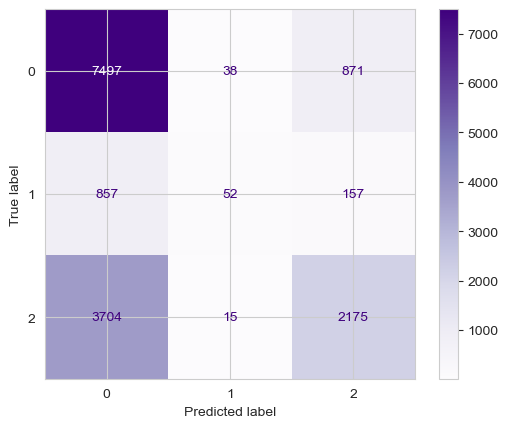

In [90]:
# Getting the model evaluation for decision tree model

model_evaluation(tuned_dt,X_train_scaled,y_train,X_val_scaled,y_val)

### Model evaluation for the Logistic Regression Model.

The training precision score is : 0.554
The validation precision score is : 0.555
-------------------------------------------------
The training  accuracy score is : 0.593
The validation accuracy score is : 0.593
.................................................
              precision    recall  f1-score   support

           0       0.59      0.91      0.72      8406
           1       0.00      0.00      0.00      1066
           2       0.60      0.25      0.36      5894

    accuracy                           0.59     15366
   macro avg       0.40      0.39      0.36     15366
weighted avg       0.56      0.59      0.53     15366

--------------------------------------------------


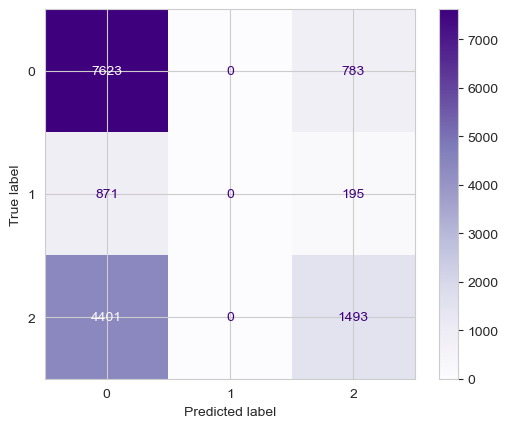

In [91]:
# Getting the model evaluation for logistic model

model_evaluation(tuned_baseline,X_train_scaled,y_train,X_val_scaled,y_val)

### Model Evaluation for the K-Nearest Neighbors (KNN) Model.

The training precision score is : 0.668
The validation precision score is : 0.601
-------------------------------------------------
The training  accuracy score is : 0.67
The validation accuracy score is : 0.615
.................................................
              precision    recall  f1-score   support

           0       0.66      0.71      0.69      8406
           1       0.39      0.08      0.13      1066
           2       0.55      0.57      0.56      5894

    accuracy                           0.61     15366
   macro avg       0.53      0.46      0.46     15366
weighted avg       0.60      0.61      0.60     15366

--------------------------------------------------


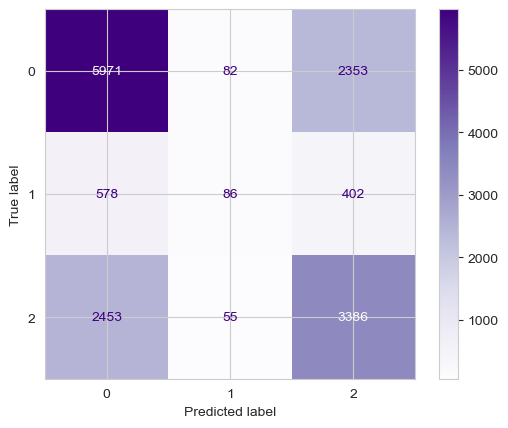

In [92]:
# Getting the model evaluation for knn model

model_evaluation(knn_tuned,X_train_scaled,y_train,X_val_scaled,y_val)


### Model Evaluation for Random Forest Model.

The training precision score is : 0.787
The validation precision score is : 0.66
-------------------------------------------------
The training  accuracy score is : 0.751
The validation accuracy score is : 0.657
.................................................
              precision    recall  f1-score   support

           0       0.64      0.89      0.75      8406
           1       0.53      0.08      0.13      1066
           2       0.71      0.43      0.53      5894

    accuracy                           0.66     15366
   macro avg       0.63      0.46      0.47     15366
weighted avg       0.66      0.66      0.62     15366

--------------------------------------------------


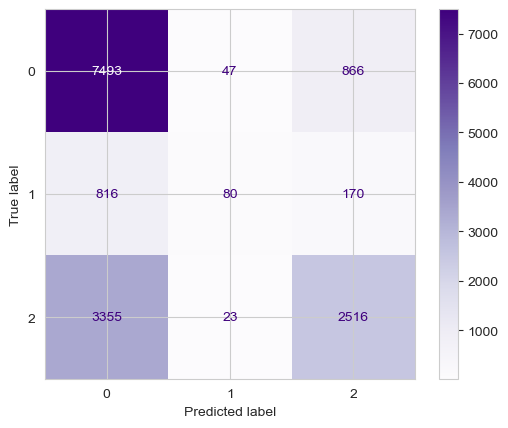

In [93]:
# Getting the model evaluation for random forest model

model_evaluation(tuned_rf,X_train_scaled,y_train,X_val_scaled,y_val)

## Conclusion 

Here we discuss the evaluation results generated above. An appropriate model based on the evaluation results shall be selected.

In [94]:
#create a dataframe of the results
results = {'Model': ['Decision_Tree', 'Logistic_Regression', 'KNN', 'Random_Forest'],
            'Accuracy':['63%', '59%', '62%', '66%'],
            'Precision': ['64%', '56%', '60%', '66%'],
            'Recall': ['63%', '59%', '61%', '66%'],
            'F1_Score': ['59%', '53%', '60%', '62%']}

results_df = pd.DataFrame(results)
display(results_df)



,Model,Accuracy,Precision,Recall,F1_Score
0,Decision_Tree,63%,64%,63%,59%
1,Logistic_Regression,59%,56%,59%,53%
2,KNN,62%,60%,61%,60%
3,Random_Forest,66%,66%,66%,62%


The table above shows the how the models performed based on the four evaluation metrics: *Accuracy*, *Precision*, *Recall* and *F1_Score*. From the results the Random Forest algorithm, having the highest performance metric scores of all performed better than the other models and shall be used as the final model The precision score of the model was 66% which means that it was able to precisely determine the status of the waterpoint 66% of the time

Summarily the following results were inferred fom the study:
1. ***The final model was selected as the Random Forest***
2. ***Most functional waterpoint pumps are those that have soft water***
3. ***Waterpoints with enough water are the most functional***
4. ***Iringa, Kilimanjaro and Shinyanga are the top 3 regions with most functional pumps***
5. ***Kilimanjaro and Mbeya have the regions with the most non-functional pumps***
6. ***Kigoma has the highest number of waterpoints that need repair***
7. ***Water drawn from springs and shallow wells have the highest number of functional pumps***
8. ***Water drawn from Springs have the highest number of functional pumps that need repair***
9. ***Water drawn from Shallow wells and boreholes have the highest number of non functional wells***
10. ***Those waterpoints with insufficient water have very few functional pumps***